##  <p align="center" style="background-color:#16A085; font-family:newtimeroman; color:#FFF9ED; font-size:125%; border-radius:10px 10px;">Step 1 : IMPORTS</p>


In [14]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [15]:
df = pd.read_csv('/Users/anilfurkanembel/Desktop/Raw Datas/movies_metadata.csv', low_memory=False)

##  <p align="center" style="background-color:#16A085; font-family:newtimeroman; color:#FFF9ED; font-size:125%; border-radius:10px 10px;">Step 2 :  EDA(Exploratory Data Analysis) </p>



We will drop empty and duplicated data

In [16]:
df = df[~df["title"].duplicated(keep='last')]
df = df[~df["title"].isna()]
df = df[~df["overview"].isna()]

We are gonna drop unneccessary columns 

In [17]:
columns_to_drop = ['adult','belongs_to_collection','status','homepage','imdb_id','original_title','spoken_languages','video']
df.drop(columns_to_drop, axis=1, inplace=True)

We are going to make Country Name and Company Name in a one sentence and for nan values We are gonna use unknown

In [18]:
df['production_companies'] = df['production_companies'].replace(np.nan,'unknown')
df['production_companies'] = df['production_companies'].apply(lambda x: x.split(',')[0])
df['production_companies'] = df['production_companies'].apply(lambda x: x.split(':')[-1])


In [19]:
df['production_countries'] = df['production_countries'].replace(np.nan,'unknown')
df['production_countries'] = df['production_countries'].apply(lambda x: x.split(':')[-1])
df['production_countries'] = df['production_countries'].apply(lambda x : x[:-2])

I'm Gonna Change The Languages like en = English 

In [20]:
language_dict = {'en': 'English', 'fr': 'French', 'zh': 'Chinese', 'fa': 'Persian',
                 'nl': 'Dutch', 'de': 'German', 'cn': 'Chinese', 'it': 'Italian',
                 'ar': 'Arabic', 'es': 'Spanish', 'ru': 'Russian', 'ja': 'Japanese',
                 'sv': 'Swedish', 'ko': 'Korean', 'bn': 'Bengali', 'pt': 'Portuguese',
                 'sr': 'Serbian', 'wo': 'Wolof', 'ro': 'Romanian', 'hu': 'Hungarian',
                 'cy': 'Welsh', 'vi': 'Vietnamese', 'da': 'Danish', 'no': 'Norwegian',
                 'cs': 'Czech', 'nb': 'Norwegian Bokmål', 'pl': 'Polish', 'el': 'Greek',
                 'sh': 'Serbo-Croatian', 'xx': 'Unknown', 'mk': 'Macedonian', 'ca': 'Catalan',
                 'fi': 'Finnish', 'th': 'Thai', 'sk': 'Slovak', 'he': 'Hebrew', 'hi': 'Hindi',
                 'bs': 'Bosnian', 'tr': 'Turkish', 'is': 'Icelandic', 'ps': 'Pashto',
                 'ab': 'Abkhazian', 'ka': 'Georgian', 'mn': 'Mongolian', 'bm': 'Bambara',
                 'uk': 'Ukrainian', 'af': 'Afrikaans', 'bo': 'Tibetan', 'la': 'Latin',
                 'ku': 'Kurdish', 'fy': 'Western Frisian', 'lv': 'Latvian', 'ta': 'Tamil',
                 'sl': 'Slovenian', 'tl': 'Tagalog', 'ur': 'Urdu', 'rw': 'Kinyarwanda',
                 'id': 'Indonesian', 'bg': 'Bulgarian', 'mr': 'Marathi', 'lt': 'Lithuanian',
                 'et': 'Estonian', 'kk': 'Kazakh', 'ms': 'Malay', 'sq': 'Albanian',
                 'qu': 'Quechua', 'te': 'Telugu', 'am': 'Amharic', 'jv': 'Javanese',
                 'tg': 'Tajik', 'ml': 'Malayalam', 'hr': 'Croatian', 'lo': 'Lao',
                 'ay': 'Aymara', 'kn': 'Kannada', 'eu': 'Basque', 'ne': 'Nepali',
                 'pa': 'Punjabi', 'ky': 'Kirghiz', 'gl': 'Galician', 'uz': 'Uzbek',
                 'sm': 'Samoan', 'mt': 'Maltese', 'hy': 'Armenian', 'iu': 'Inuktitut',
                 'lb': 'Luxembourgish', 'si': 'Sinhalese'}

df['original_language'] = df['original_language'].apply(lambda x: language_dict.get(x,x))
df['Language'] = df['original_language']
df.drop('original_language', axis=1, inplace= True)


In [21]:
df.head(7)

,budget,genres,id,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,tagline,title,vote_average,vote_count,Language
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,'Pixar Animation Studios','United States of America',1995-10-30,373554033.0,81.0,NaN,Toy Story,7.7,5415.0,English
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,'TriStar Pictures','United States of America',1995-12-15,262797249.0,104.0,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,English
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,'Warner Bros.','United States of America',1995-12-22,0.0,101.0,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,English
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,'Twentieth Century Fox Film Corporation','United States of America',1995-12-22,81452156.0,127.0,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,English
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,'Sandollar Productions','United States of America',1995-02-10,76578911.0,106.0,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,English
7,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",45325,"A mischievous young boy, Tom Sawyer, witnesses...",2.561161,/sGO5Qa55p7wTu7FJcX4H4xIVKvS.jpg,'Walt Disney Pictures','United States of America',1995-12-22,0.0,97.0,The Original Bad Boys.,Tom and Huck,5.4,45.0,English
8,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,International action superstar Jean Claude Van...,5.23158,/eoWvKD60lT95Ss1MYNgVExpo5iU.jpg,'Universal Pictures','United States of America',1995-12-22,64350171.0,106.0,Terror goes into overtime.,Sudden Death,5.5,174.0,English


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41344 entries, 0 to 45465
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                41344 non-null  object 
 1   genres                41344 non-null  object 
 2   id                    41344 non-null  object 
 3   overview              41344 non-null  object 
 4   popularity            41344 non-null  object 
 5   poster_path           41009 non-null  object 
 6   production_companies  41344 non-null  object 
 7   production_countries  41344 non-null  object 
 8   release_date          41273 non-null  object 
 9   revenue               41344 non-null  float64
 10  runtime               41344 non-null  float64
 11  tagline               18560 non-null  object 
 12  title                 41344 non-null  object 
 13  vote_average          41344 non-null  float64
 14  vote_count            41344 non-null  float64
 15  Language           

##  <p align="center" style="background-color:#16A085; font-family:newtimeroman; color:#FFF9ED; font-size:125%; border-radius:10px 10px;">Step 3 :  Creating TF-IDF Matrix </p>



In [23]:
tfidf = TfidfVectorizer(stop_words="english")

tfidf_matrix = tfidf.fit_transform(df['overview'])

print(tfidf_matrix.shape)

(41344, 73955)


Shape: (41344, 73955)

41344:  Overviews so Movies

73955: Words

Value: TF-IDF Scores


In [24]:
tfidf_matrix = tfidf_matrix.astype(np.float32) # it's too big so it's very difficult to process so i halved the size

##  <p align="center" style="background-color:#16A085; font-family:newtimeroman; color:#FFF9ED; font-size:125%; border-radius:10px 10px;">Step 4 :  Creating the Cosine Similarity Matrix </p>

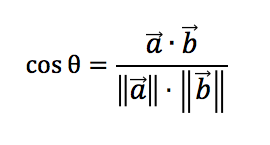

Cosine similarity is one of the metric to measure the text-similarity between two documents irrespective of their size in Natural language Processing. A word is represented into a vector form. The text documents are represented in n-dimensional vector space.


In [25]:
cosine_sim = cosine_similarity(tfidf_matrix,
                               tfidf_matrix)

print(cosine_sim.shape)
cosine_sim[1]

(41344, 41344)


array([0.01515217, 1.        , 0.04651843, ..., 0.        , 0.02192681,
       0.00924592], dtype=float32)

shape: (41344, 41344) 

41344: movies

##  <p align="center" style="background-color:#16A085; font-family:newtimeroman; color:#FFF9ED; font-size:125%; border-radius:10px 10px;">Step 5 :  Making Suggestions Based on Similarities </p> 

In [26]:
# reset the index of the dataframe
df = df.reset_index(drop=True)

# define the function to get top 5 similar movies
def get_top_5_similar_movies(row):
    # Get the cosine similarity scores of the movies
    similarity_scores = cosine_sim[row.name]
    # Get the indices of the top 5 similar movies -> (6 because the movie of the line row will be included) -> in return select only the 5 last ones
    top_5_indices = np.argpartition(-similarity_scores, range(6))[:6][-5:]
    top_5_ids = [df.iloc[i]['id'] for i in top_5_indices]
    return pd.Series(top_5_ids, index=['sim_movie_1', 'sim_movie_2', 'sim_movie_3', 'sim_movie_4', 'sim_movie_5'])

# add the 5 most similar movies in the dataframe (40-50 sec)
df[['sim_movie_1', 'sim_movie_2', 'sim_movie_3', 'sim_movie_4', 'sim_movie_5']] = df.apply(get_top_5_similar_movies, axis=1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41344 entries, 0 to 41343
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                41344 non-null  object 
 1   genres                41344 non-null  object 
 2   id                    41344 non-null  object 
 3   overview              41344 non-null  object 
 4   popularity            41344 non-null  object 
 5   poster_path           41009 non-null  object 
 6   production_companies  41344 non-null  object 
 7   production_countries  41344 non-null  object 
 8   release_date          41273 non-null  object 
 9   revenue               41344 non-null  float64
 10  runtime               41344 non-null  float64
 11  tagline               18560 non-null  object 
 12  title                 41344 non-null  object 
 13  vote_average          41344 non-null  float64
 14  vote_count            41344 non-null  float64
 15  Language           

In [30]:
sim_movie_columns = ['sim_movie_1', 'sim_movie_2', 'sim_movie_3', 'sim_movie_4', 'sim_movie_5']
sim_movies_df = df[sim_movie_columns]

In [31]:
def get_movie_info(movie_id):
    movie = df[df['id'] == movie_id].iloc[0]
    return {
        'title': movie['title'],
        'Language': movie['Language'],
        'vote_average': movie['vote_average'],
        'poster_path': movie['poster_path']
    }

In [32]:
movie_info_df = sim_movies_df.applymap(lambda x: get_movie_info(x))

In [33]:
df = pd.concat([df, movie_info_df.add_suffix('_info')], axis=1)
df.to_csv('..\Data\movies_with_recommendation.csv', index=False)

In [34]:
df

,budget,genres,id,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,...,sim_movie_1,sim_movie_2,sim_movie_3,sim_movie_4,sim_movie_5,sim_movie_1_info,sim_movie_2_info,sim_movie_3_info,sim_movie_4_info,sim_movie_5_info
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,'Pixar Animation Studios','United States of America',1995-10-30,373554033.0,...,10193,863,6957,82424,92848,"{'title': 'Toy Story 3', 'Language': 'English'...","{'title': 'Toy Story 2', 'Language': 'English'...","{'title': 'The 40 Year Old Virgin', 'Language'...","{'title': 'Small Fry', 'Language': 'English', ...","{'title': 'Andy Hardy's Blonde Trouble', 'Lang..."
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,'TriStar Pictures','United States of America',1995-12-15,262797249.0,...,157129,96823,217672,133977,253258,"{'title': 'Table No. 21', 'Language': 'English...","{'title': 'Quiz', 'Language': 'Dutch', 'vote_a...","{'title': 'Snowed Under', 'Language': 'English...","{'title': 'Liar Game: Reborn', 'Language': 'Ja...","{'title': 'The Mend', 'Language': 'English', '..."
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,'Warner Bros.','United States of America',1995-12-22,0.0,...,15653,110713,15789,130747,95862,"{'title': 'An Extremely Goofy Movie', 'Languag...","{'title': 'Max', 'Language': 'English', 'vote_...","{'title': 'A Goofy Movie', 'Language': 'Englis...","{'title': 'The Guardians', 'Language': 'German...","{'title': 'The Phantom of Paris', 'Language': ..."
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,'Twentieth Century Fox Film Corporation','United States of America',1995-12-22,81452156.0,...,82868,113175,237960,131074,222731,"{'title': 'I Don't Buy Kisses Anymore', 'Langu...","{'title': 'Robin of Locksley', 'Language': 'En...","{'title': 'Starring Adam West', 'Language': 'E...","{'title': 'Hunted', 'Language': 'English', 'vo...","{'title': 'Chatterbox', 'Language': 'English',..."
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,'Sandollar Productions','United States of America',1995-02-10,76578911.0,...,11846,14603,6523,137429,348929,"{'title': 'Father of the Bride', 'Language': '...","{'title': 'Kuffs', 'Language': 'English', 'vot...","{'title': 'North to Alaska', 'Language': 'Engl...","{'title': 'Babbitt', 'Language': 'English', 'v...","{'title': 'You're Killing Me', 'Language': 'En..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41339,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],'Iran',NaN,0.0,...,20213,166225,81543,389995,363413,"{'title': 'The Manxman', 'Language': 'English'...","{'title': 'Khel', 'Language': 'English', 'vote...","{'title': 'So Much So Fast', 'Language': 'Engl...","{'title': 'Me casé con un boludo', 'Language':...","{'title': 'Pyaar Ka Punchnama 2', 'Language': ..."
41340,0,"[{'id': 18, 'name': 'Drama'}]",111109,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,'Sine Olivia','Philippines',2011-11-17,0.0,...,88302,25051,47763,190341,285838,"{'title': 'Pirosmani', 'Language': 'Georgian',...","{'title': 'Distance', 'Language': 'Japanese', ...","{'title': 'The Shrine', 'Language': 'English',...","{'title': 'The Gypsy Charmer', 'Language': 'Fi...","{'title': 'Teen Lust', 'Language': 'English', ..."
41341,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,"When one of her hits